<a href="https://colab.research.google.com/github/bhattacharyyad/Debnath_Code/blob/master/DeepL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


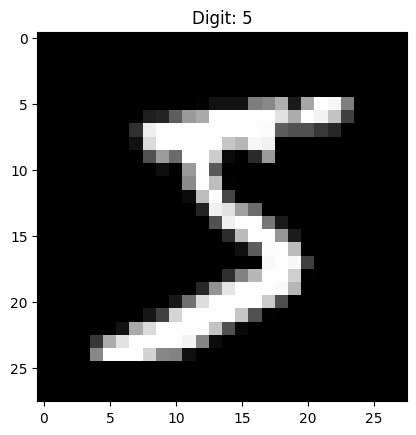

In [3]:
plt.imshow(x_train[0], cmap="gray")
plt.title("Digit: " + str(y_train[0]))
plt.show()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
Conv2D(32, (3,3), activation='relu')

<Conv2D name=conv2d_1, built=False>

In [8]:
MaxPooling2D((2,2))

<MaxPooling2D name=max_pooling2d_1, built=True>

In [9]:
Flatten()

<Flatten name=flatten_1, built=False>

In [10]:
Dense(128, activation='relu')

<Dense name=dense_2, built=False>

In [11]:
Dense(10, activation='softmax')

<Dense name=dense_3, built=False>

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9104 - loss: 0.2950
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9829 - loss: 0.0557
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9898 - loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9951 - loss: 0.0165
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9963 - loss: 0.0120


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9833 - loss: 0.0565
Test Accuracy: 0.9865999817848206


In [15]:
prediction = model.predict(x_test)

print("Predicted Digit:", prediction[0].argmax())
print("Actual Digit:", y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted Digit: 7
Actual Digit: 7


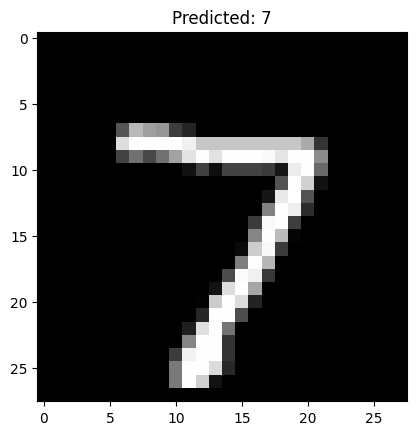

In [16]:
plt.imshow(x_test[0].reshape(28,28), cmap="gray")
plt.title("Predicted: " + str(prediction[0].argmax()))
plt.show()